<a href="https://colab.research.google.com/github/lisatwyw/epi-galla/blob/main/LDA_predictions_BoneMineralDensity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Topics

- Another ```function```
- Working with dataframe ```with``` vs ```$```
- Linear discriminate analysis

# Predicting probability of fractures from BMD 

- This notebook is an example from [bookdown](https://bookdown.org/tpinto_home/Regression-and-Classification/#datasets-used-in-the-examples)

- Predict fracture given BMD?


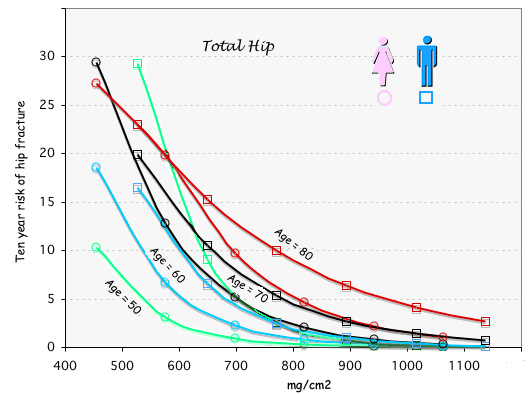


Source: https://courses.washington.edu/bonephys/opFxRisk2.html



**References**:
- "Is bone mineral density predictive of fracture risk reduction?" by [Cefalu](https://pubmed.ncbi.nlm.nih.gov/15025843/)
- "The relationship between bone mineral density and fracture risk" by [McClung](https://pubmed.ncbi.nlm.nih.gov/16036103/)


## 1) Load dataframe from URL

```
id – patient’s number
age – patient’s age
fracture – hip fracture (fracture / no fracture)
weight_kg – weight measured in Kg
height_cm – height measure in cm
waiting_time – time the patient had to wait for the densitometry (in minutes)
bmd – bone mineral density measure in the hip
```


In [ ]:
set.seed(1974) #fix the random generator seed 

#read the data
new_df <- read.csv("https://www.dropbox.com/s/c6mhgatkotuze8o/bmd.csv?dl=1", stringsAsFactors = TRUE)
str(bmd_df)

'data.frame':	169 obs. of  9 variables:
 $ id          : int  469 8724 6736 24180 17072 3806 17106 23834 2454 2088 ...
 $ age         : num  57.1 75.7 70.8 78.2 54.2 ...
 $ sex         : chr  "F" "F" "M" "F" ...
 $ fracture    : chr  "no fracture" "no fracture" "no fracture" "no fracture" ...
 $ weight_kg   : num  64 78 73 60 55 65 77 59 64 72 ...
 $ height_cm   : num  156 162 170 148 161 ...
 $ medication  : chr  "Anticonvulsant" "No medication" "No medication" "No medication" ...
 $ waiting_time: int  18 56 10 14 20 7 26 9 6 10 ...
 $ bmd         : num  0.879 0.795 0.907 0.711 0.791 ...


In [ ]:
df <- read.csv("https://www.dropbox.com/s/c6mhgatkotuze8o/bmd.csv?dl=1")
str(df)

'data.frame':	169 obs. of  9 variables:
 $ id          : int  469 8724 6736 24180 17072 3806 17106 23834 2454 2088 ...
 $ age         : num  57.1 75.7 70.8 78.2 54.2 ...
 $ sex         : chr  "F" "F" "M" "F" ...
 $ fracture    : chr  "no fracture" "no fracture" "no fracture" "no fracture" ...
 $ weight_kg   : num  64 78 73 60 55 65 77 59 64 72 ...
 $ height_cm   : num  156 162 170 148 161 ...
 $ medication  : chr  "Anticonvulsant" "No medication" "No medication" "No medication" ...
 $ waiting_time: int  18 56 10 14 20 7 26 9 6 10 ...
 $ bmd         : num  0.879 0.795 0.907 0.711 0.791 ...


In [ ]:
bmd_df0$waiting_time + 1L

[1] 19 57 11 15 21  8 27 10  7 11 13  6 12 29 74 14  6  9 12 22 11 38 15 23 65
 [26] 11  6 10 16 23 21 18 34 18 24 14  9  9 22 22 90 18 19  7  6 26 13 11 14  9
 [51] 17 20 19 20 15  8  7 15 61 12 35 19 29 12 28 23 12  9 14 12  9  9 11 14 16
 [76]  7 16 12 10 10 25 25  7  9  8  8 15  6 11 34 39 24 30  8 40 22 10 19 39 30
[101] 10 13 12 20 48  7 25 15  7 31 52  7  6 24 30 10 11 41  6 21 13 33 16 32 70
[126]  8  8 35 11  8 22 36 33 21 39 48  9 13 27 60 22 97 10 24 25  7 12  8  8 15
[151] 14 30 16 35 18  8 24 39 12  7 33 21 49  9 50  7 11 15 26

In [ ]:
bmd_df[['age']]

[1] 57.05277 75.74122 70.77890 78.24718 54.19188 77.17775 56.18062 49.91614
  [9] 68.40840 66.25665 45.86658 73.97047 60.55542 64.21310 53.39544 66.82546
 [17] 57.93459 40.23237 69.04818 57.80230 58.19133 46.08155 65.79535 60.18946
 [25] 54.99218 51.43072 70.19857 77.15502 70.42187 75.01548 54.91253 70.02850
 [33] 48.81687 49.78744 41.41762 67.92438 60.83136 62.71791 69.65373 81.47969
 [41] 73.23043 54.42421 66.64487 83.84774 67.65108 82.42316 54.23390 42.81703
 [49] 69.72845 76.86391 43.45071 67.57338 56.20813 88.75380 70.40792 62.06524
 [57] 61.18467 48.28949 49.73132 36.64831 63.67318 74.17836 63.28729 56.95872
 [65] 46.56490 47.02465 84.78739 54.40618 51.59654 61.17009 73.94031 54.77277
 [73] 66.67269 59.46132 50.36052 55.41171 56.54582 63.48784 72.08056 58.26221
 [81] 58.67087 58.33505 39.25495 60.23658 63.76954 44.23968 79.39971 65.13436
 [89] 66.55922 35.81406 69.08664 59.26118 59.70722 61.60041 69.23719 52.32252
 [97] 72.77239 60.22139 58.81241 54.49763 52.90099 63.02470 64.06595 52.79292
[105] 49.20966 68.57131 77.90640 68.55088 44.68313 67.92553 68.06825 52.47831
[113] 60.88360 43.46317 57.56918 56.96446 52.24655 56.93127 66.33562 83.09365
[121] 81.48137 53.53172 69.21393 73.06760 87.93494 77.76868 81.08739 53.76929
[129] 80.77319 76.94474 82.40718 57.58120 77.81962 76.74552 54.15273 72.27014
[137] 68.01775 88.02415 69.97770 71.17212 70.94756 74.79688 83.21982 81.97956
[145] 85.90159 71.47172 76.73260 83.67836 85.57631 70.81094 68.68329 86.85987
[153] 80.06021 61.64450 66.80419 37.46199 63.44197 51.04837 48.52365 41.35120
[161] 84.72176 59.07608 50.27606 67.25216 77.98254 50.28530 46.35972 54.78837
[169] 69.99482

## 2) Inspect the variables stored in the dataframe

In [ ]:
str(bmd_df)

'data.frame':	169 obs. of  9 variables:
 $ id          : int  469 8724 6736 24180 17072 3806 17106 23834 2454 2088 ...
 $ age         : num  57.1 75.7 70.8 78.2 54.2 ...
 $ sex         : chr  "F" "F" "M" "F" ...
 $ fracture    : chr  "no fracture" "no fracture" "no fracture" "no fracture" ...
 $ weight_kg   : num  64 78 73 60 55 65 77 59 64 72 ...
 $ height_cm   : num  156 162 170 148 161 ...
 $ medication  : chr  "Anticonvulsant" "No medication" "No medication" "No medication" ...
 $ waiting_time: int  18 56 10 14 20 7 26 9 6 10 ...
 $ bmd         : num  0.879 0.795 0.907 0.711 0.791 ...


In [ ]:
a<-bmd_df[ seq(1,5), ]
b<-bmd_df[ seq(160,165), ]
a
b
merge(a,b, by='id')

,id,age,sex,fracture,weight_kg,height_cm,medication,waiting_time,bmd
,<int>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<int>,<dbl>
1,469,57.05277,F,no fracture,64,155.5,Anticonvulsant,18,0.8793
2,8724,75.74122,F,no fracture,78,162.0,No medication,56,0.7946
3,6736,70.77890,M,no fracture,73,170.5,No medication,10,0.9067
4,24180,78.24718,F,no fracture,60,148.0,No medication,14,0.7112
5,17072,54.19188,M,no fracture,55,161.0,No medication,20,0.7909


,id,age,sex,fracture,weight_kg,height_cm,medication,waiting_time,bmd
,<int>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<int>,<dbl>
160,5298,41.35120,M,fracture,45,159.5,No medication,6,0.7076
161,2797,84.72176,M,fracture,52,161.0,No medication,32,0.7085
162,2020,59.07608,M,fracture,64,170.0,No medication,20,0.7246
163,23824,50.27606,F,fracture,60,170.0,Anticonvulsant,48,0.7399
164,7192,67.25216,M,fracture,80,172.0,No medication,8,0.7745
165,21892,77.98254,M,fracture,74,164.0,No medication,49,0.7941


id,age.x,sex.x,fracture.x,weight_kg.x,height_cm.x,medication.x,waiting_time.x,bmd.x,age.y,sex.y,fracture.y,weight_kg.y,height_cm.y,medication.y,waiting_time.y,bmd.y
<int>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<int>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<int>,<dbl>



### Aside: some programmers use ```with``` function so they don't need to reference with ```$```

In [ ]:
# mean bmd for pple w/ fracture
(mean_f   <- with( bmd_df, mean(bmd[fracture=="fracture"]))  )

# mean bmd for npple w/o fracture
mean_nf  <- with( bmd_df, mean(bmd[fracture=="no fracture"])) 



[1] 0.623308

In [ ]:
# below is the longer way but it's clear which dataframe we're referring to!!!
bmd_df$bmd[bmd_df$fracture=="fracture"] 

[1] 0.4586 0.4818 0.5279 0.5285 0.5287 0.5387 0.5419 0.5515 0.5579 0.5676
[11] 0.5635 0.5721 0.5294 0.5547 0.5603 0.5693 0.6001 0.6103 0.6204 0.6264
[21] 0.4076 0.4407 0.4852 0.5555 0.5615 0.6102 0.6297 0.6385 0.6388 0.6409
[31] 0.6432 0.6448 0.6495 0.6708 0.6880 0.6882 0.6884 0.6899 0.6904 0.6904
[41] 0.7076 0.7085 0.7246 0.7399 0.7745 0.7941 0.7971 0.8037 0.8072 0.8664

In [ ]:
(mean_f<- mean( bmd_df$bmd[bmd_df$fracture=="fracture"]  ))
(mean_nf<- mean( bmd_df$bmd[bmd_df$fracture=="no fracture"]  ))


[1] 0.623308

[1] 0.8502454

## 3) Exploratory data analysis

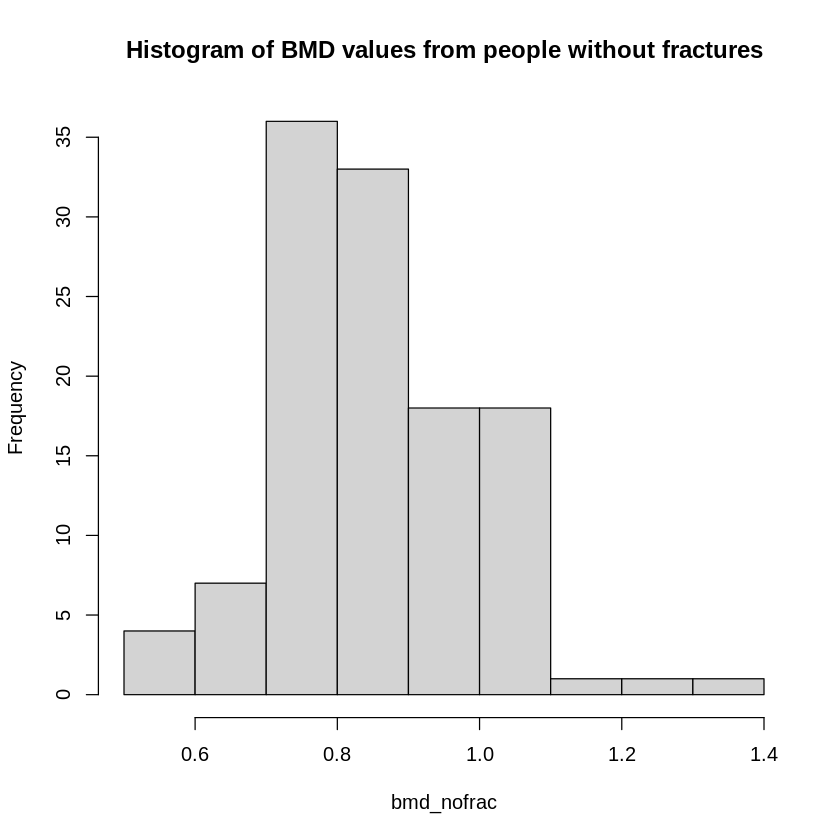

In [ ]:
bmd_nofrac<- bmd_df[ bmd_df$fracture=="no fracture", ] $bmd
hist(bmd_nofrac, main="Histogram of BMD values from people without fractures")

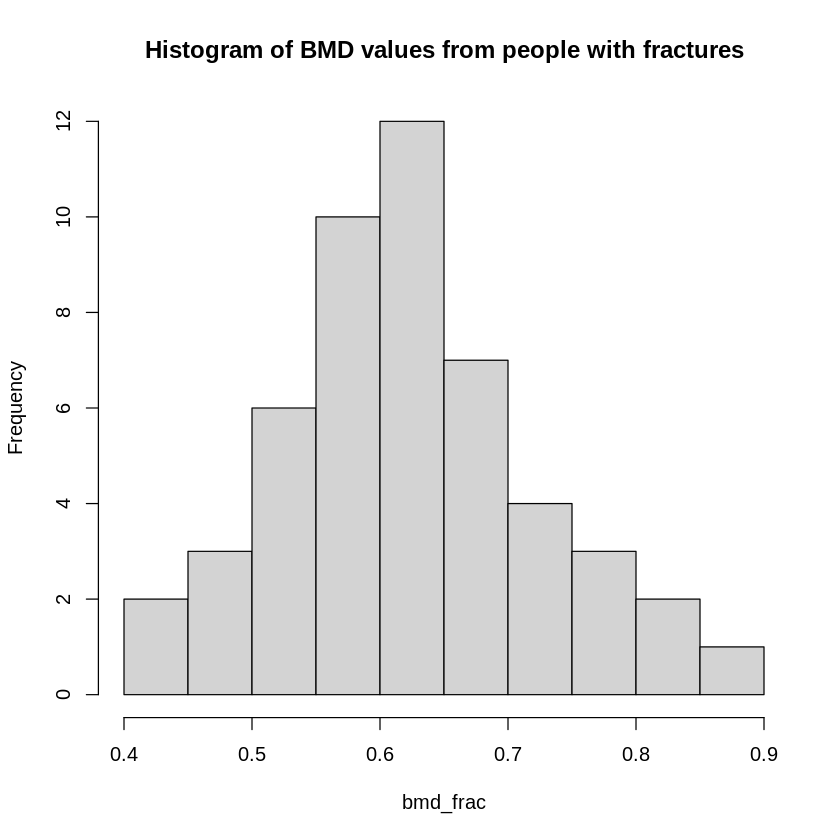

In [ ]:
bmd_frac<- bmd_df[ bmd_df$fracture=="fracture", ] $bmd
hist(bmd_frac, main="Histogram of BMD values from people with fractures" )

In [ ]:
# subsetting so we only contain 2 variables in this new df
data<-data.frame( bmd_df$bmd, bmd_df$fracture )
head(data,5)

,bmd_df.bmd,bmd_df.fracture
,<dbl>,<chr>
1,0.8793,no fracture
2,0.7946,no fracture
3,0.9067,no fracture
4,0.7112,no fracture
5,0.7909,no fracture


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


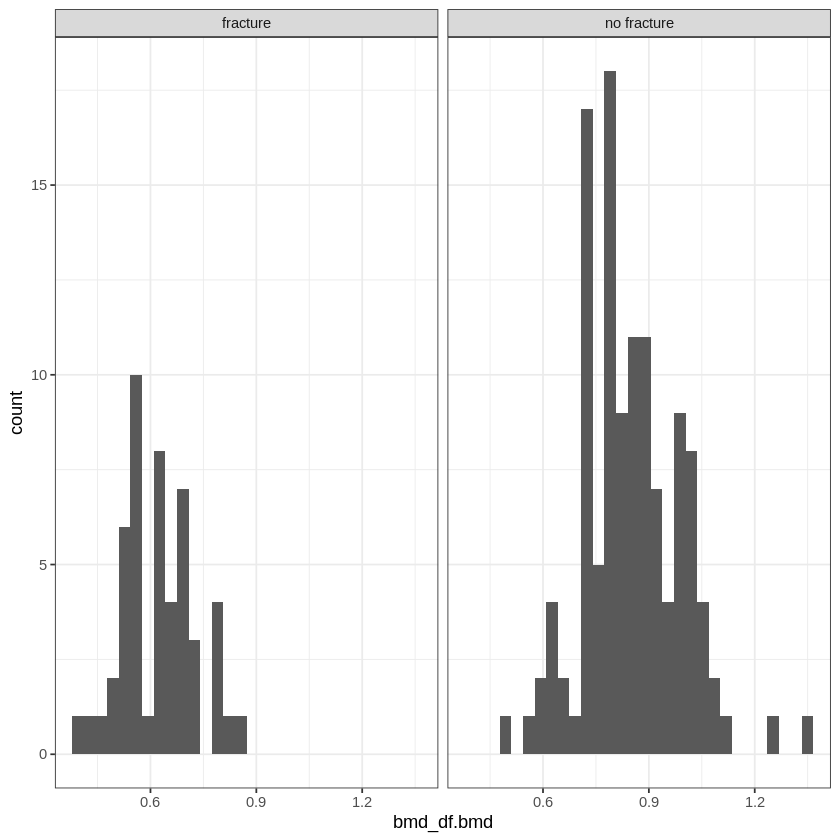

In [ ]:
library(ggplot2)
ggplot(data, aes(x=bmd_df.bmd) )+geom_histogram()+facet_grid(~bmd_df.fracture)+theme_bw()

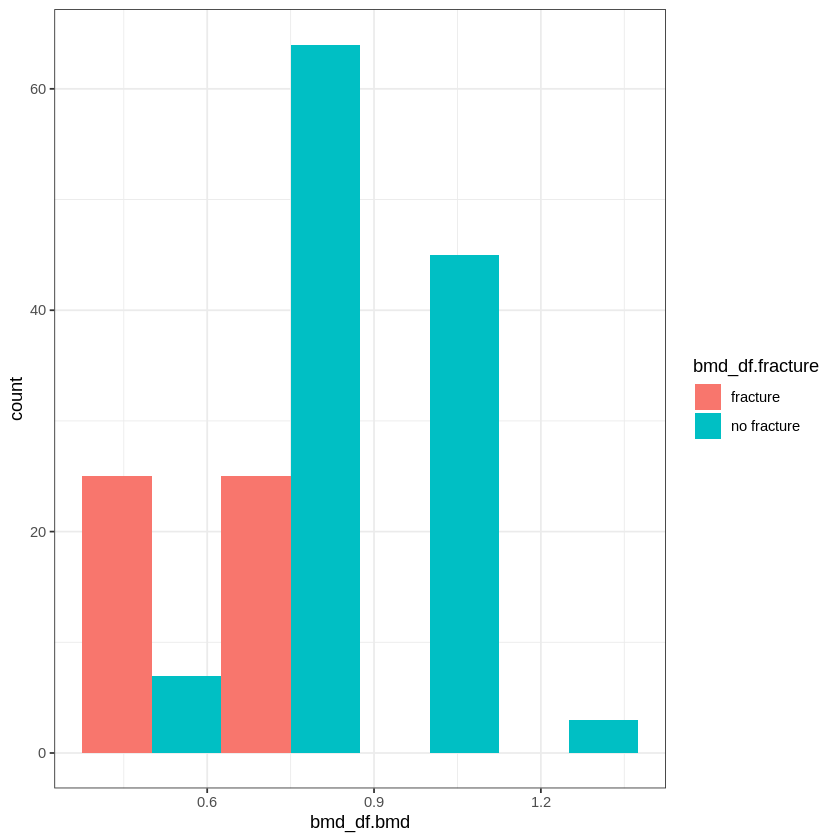

In [ ]:
ggplot(data, aes(x=bmd_df.bmd, group=bmd_df.fracture, fill=bmd_df.fracture )) + geom_histogram(position="dodge",binwidth=0.25)+theme_bw()

In [ ]:
( N <-dim(bmd_df)[1] )

ssd_nf<-sum( (bmd_df[ bmd_df$fracture=="no fracture", ]$bmd - mean_nf)^2 ) # SSD
ssd_f <-sum( (bmd_df[ bmd_df$fracture=="fracture", ]$bmd - mean_f)^2 ) # SSD

(sigma_bmd <- sqrt( (ssd_f+ssd_nf)/( N-2)  ))

[1] 169

[1] 0.1305394

In [ ]:
# prior probs
(prbs_fracture <- prop.table(table( bmd_df$fracture) ))     


   fracture no fracture 
   0.295858    0.704142 

In [ ]:
query<-0.54

p_f <-query*mean_nf/sigma_bmd^2 - mean_nf^2/(2*sigma_bmd^2) + log(prbs_fracture[2]) # <--  note this is 2nd element
p_nf<-query*mean_f/sigma_bmd^2  - mean_f^2 /(2*sigma_bmd^2) + log(prbs_fracture[1]) # <--  note this is 1st element    

p_f
p_nf



no fracture 
   5.381084

fracture 
7.134559

In [ ]:
(rnames<-rownames( prbs_fracture ))


[1] "fracture"    "no fracture"

In [ ]:
( indx_f <- which( rnames=="fracture" ) )
( indx_nf <- which( rnames=="no fracture" ) )

[1] 1

[1] 2

In [ ]:
# repeat with better coding
p_f <-query*mean_nf/sigma_bmd^2 - mean_nf^2/(2*sigma_bmd^2) + log(prbs_fracture[ indx_nf ]) # <--  note this is 2nd element
p_nf<-query*mean_f/sigma_bmd^2  - mean_f^2 /(2*sigma_bmd^2) + log(prbs_fracture[ indx_f ]) # <--  note this is 1st element    



In [ ]:
prbs_fracture


length(g2)/ (length(g2)+length(g1))
length(g1)/ (length(g2)+length(g1))


   fracture no fracture 
   0.295858    0.704142 

ERROR: ignored

In [ ]:
# define function 
calc_probs <- function( g1, g2, query ) 
{
  mean1 <- mean(g1)
  mean2 <- mean(g2)

  N<- length(g2)+length(g1)

  ssd_1 <-sum( (g1 - mean1 )^2 ) # SSD
  ssd_2 <-sum( (g2 - mean2 )^2 ) # SSD
  
  sigma <- sqrt( (ssd_1 + ssd_2 )/( N-2)  )

  pr2<- length(g2)/ (length(g2)+length(g1))
  pr1<- length(g1)/ (length(g2)+length(g1))

 
  q1<-query*mean1/ sigma^2  - mean1^2/ 2/ sigma^2 + log(  pr1 )   
  q2<-query*mean2/ sigma**2 - mean2**2/ 2/ sigma**2 + log( pr2 )


  mle<-c(q1,q2) 

  cat( 'Class', which.max( c(q1,q2) ) , 'is more likely')
  return( mle )
}

# call the function 

g1<-unlist( bmd_df[ bmd_df$fracture=="no fracture", ]$bmd )
g2<-unlist( bmd_df[ bmd_df$fracture=="fracture", ]$bmd  )

res<-calc_probs( g1, g2, .54 )
res

In [ ]:
'without:'
quantile(g1,.25)
quantile(g1,.75)
'with:'
quantile(g2,.25)
quantile(g2,.75)


### Reuse the function to calculate different queries

In [ ]:
(res<-calc_probs( g1, g2, 0.51 ))

In [ ]:
(res<-calc_probs( g1, g2, 0.49 ))


In [ ]:
(res<-calc_probs( g1, g2, 0.7 ))


In [ ]:
factors <- bmd_df$fracture 
factors 
typeof(factors)

In [ ]:
table( factors )

In [ ]:
table(bmd_df$fracture)/sum(table(bmd_df$fracture))

## 4) Create a table of probabilities of fracture/no fracture

Note they sum to 1

In [ ]:
prbs  <- prop.table(table(bmd_df$fracture))
print( prbs )

In [ ]:
# For fracture
0.54*mn_f/sig^2 - mn_f^2/(2*sig^2) + log(prbs[1])      

In [ ]:
 print(c(mn_f, mn_nf, sig ))
## [1] 0.6233080 0.8502454 0.1305394


## 5) Build an LDA model that regresses fraction on BMD

In [ ]:
library(MASS) # for lda function

# create a test sample with bmd=-.54 
test_samp <- data.frame(bmd=0.54)

In [ ]:
 test_samp


In [ ]:
lda_model <- lda(fracture~bmd, data=bmd_df)
pred_lda <- predict( lda_model)$class


table( bmd_df$fracture, pred_lda )

## 6) Build another model (quadratic discriminate analysis) 

In [ ]:
qda_model <- qda(fracture ~ bmd,        data=bmd_df )


#confusion matrix
table( bmd_df$fracture, pred_lda)


In [ ]:
pred_qda <- predict(qda_model)$class

#confusion matrix
table( bmd_df$fracture, pred_qda)


In [ ]:
(lda_pred<-predict( qda_model, newdata = test_samp)$class )
(lda_pred<-predict( lda_model, newdata = test_samp)$class )


In [ ]:
table(bmd_df$fracture, pred.qda)
